# Загрузка и иследование данных


​Загрузьте и иссловатьте данные;
Иссоватьйте частоту появления значений в категориальных переменныИсследоватьуйте распределение возможных значений выр.ения.

In [7]:
import pandas as pd
data_purchases = pd.read_csv('purchases.csv')
data_purchases.info()
data_purchases.head(5)
data_purchases['item'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   6889 non-null   object 
 1   event_dt  6889 non-null   object 
 2   revenue   6889 non-null   float64
 3   item      6889 non-null   object 
dtypes: float64(1), object(3)
memory usage: 215.4+ KB


item
10 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚                  6580
20 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚                   257
РЇС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј                     24
Р‘РѕР»СЊС€РѕР№ СЏС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј      15
РњРµРіР°-РїР°Рє                                 13
Name: count, dtype: int64

In [7]:
from matplotlib import pyplot as plt
data_purchases.groupby(['item']).agg({'revenue': 'count'})


,revenue
item,
10 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚,6580
20 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚,257
РЇС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј,24
РњРµРіР°-РїР°Рє,13
Р‘РѕР»СЊС€РѕР№ СЏС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј,15


In [29]:
import pandas as pd
data_events = pd.read_excel('events.xlsx')
data_events['date'] = pd.to_datetime(data_events['event_dt']).dt.date
data_events['date'].min(), data_events['date'].max()
data_events.info()
data_events.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370374 entries, 0 to 370373
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     370374 non-null  object        
 1   event_name  370374 non-null  object        
 2   event_dt    370374 non-null  datetime64[ns]
 3   date        370374 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 11.3+ MB


,user_id,event_name,event_dt,date
0,--0-b0cbb8-a,first_game,2020-06-08 13:46:08,2020-06-08
1,--0-b0cbb8-a,first_upgrade,2020-06-09 15:52:00,2020-06-09
2,--0-b0cbb8-a,login,2020-06-01 23:36:14,2020-06-01
3,--0-b0cbb8-a,registration,2020-06-01 23:36:16,2020-06-01
4,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,2020-06-08


In [31]:
data_events['event_name'].value_counts() 

event_name
login                 83185
registration          79897
tuturial_started      74348
tutorial_completed    59857
first_game            47666
first_upgrade         17832
purchase               6889
friend_invite           700
Name: count, dtype: int64

# Группировка

Исследовать как покупки пользователей связаны с типами покупаемых предметов:
П поститьте таблицу, у которой в строках находятся названия купленных предметов (item), а в колонках количество покупок, уникальное число покупателей, общая выручка и медианная ценаД, доитььте в таблицу колонки "% от общих покупок" и % выручкцена']

In [66]:

from matplotlib import pyplot as plt
data_purchases = pd.read_csv('purchases.csv')
data_purchases.info()
data_purchases.head(5)
report = data_purchases.groupby('item').agg({'user_id': ['nunique', 'count'], 'revenue': ['sum', 'median']})
report.columns = ['Количество покупателей', 'Количество покупок', 'Выручка', 'Медианная цена']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   6889 non-null   object 
 1   event_dt  6889 non-null   object 
 2   revenue   6889 non-null   float64
 3   item      6889 non-null   object 
dtypes: float64(1), object(3)
memory usage: 215.4+ KB


In [68]:
report

,Количество покупателей,Количество покупок,Выручка,Медианная цена
item,,,,
10 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚,1376,6580,6580.0,1.0
20 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚,219,257,385.5,1.5
РЇС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј,23,24,72.0,3.0
РњРµРіР°-РїР°Рє,13,13,130.0,10.0
Р‘РѕР»СЊС€РѕР№ СЏС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј,15,15,75.0,5.0


In [80]:
report['% от общих покупок'] = report['Количество покупок'] / report['Количество покупок'].sum()
report['% выручки'] = report['Выручка'] / report['Выручка'].sum()

report.style.format({'% от общих покупок': '{:.2%}', '% выручки': '{:.2%}'})


,Количество покупателей,Количество покупок,Выручка,Медианная цена,% от общих покупок,% выручки
item,,,,,,
10 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚,1376,6580,6580.000000,1.000000,95.51%,90.85%
20 Р·РѕР»РѕС‚С‹С… РјРѕРЅРµС‚,219,257,385.500000,1.500000,3.73%,5.32%
РЇС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј,23,24,72.000000,3.000000,0.35%,0.99%
РњРµРіР°-РїР°Рє,13,13,130.000000,10.000000,0.19%,1.79%
Р‘РѕР»СЊС€РѕР№ СЏС‰РёРє СЃСЋСЂРїСЂРёР·РѕРј,15,15,75.000000,5.000000,0.22%,1.04%


# Построение воронки 

Изучить воронку событий.

Построить таблицу воронки событий, содержащую колонки "Число событий", "Уникальные пользователи", "% от первого шага воронки";
Отсортировать таблицу по колонке "Уникальные пользователи;
Построить график воронки с помощью библиотеки plotly и go.Funnel.

In [98]:
data_events

,user_id,event_name,event_dt,date
0,--0-b0cbb8-a,first_game,2020-06-08 13:46:08,2020-06-08
1,--0-b0cbb8-a,first_upgrade,2020-06-09 15:52:00,2020-06-09
2,--0-b0cbb8-a,login,2020-06-01 23:36:14,2020-06-01
3,--0-b0cbb8-a,registration,2020-06-01 23:36:16,2020-06-01
4,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,2020-06-08
...,...,...,...,...
370369,9cd8aa06b00b,purchase,2020-06-30 04:10:13,2020-06-30
370370,-f-dbaa-52f0,purchase,2020-06-30 13:12:34,2020-06-30
370371,50d0c5-63801,purchase,2020-06-30 13:43:59,2020-06-30
370372,109af6_d505-,purchase,2020-06-30 08:45:05,2020-06-30


In [180]:

repot_2 = data_events.groupby(['event_name']).agg({ 'user_id': ['nunique', 'count'] })
repot_2.columns = ['События', 'Уникальные пользователи']
repot_2 = repot_2.sort_values(by = 'Уникальные пользователи', ascending = False)
repot_2['%'] = repot_2['Уникальные пользователи'] /  repot_2['Уникальные пользователи'].values[0]
repot_2.style.format({'%': '{:.2%}'})



,События,Уникальные пользователи,%
event_name,,,
login,83185,83185,100.00%
registration,79897,79897,96.05%
tuturial_started,74348,74348,89.38%
tutorial_completed,59857,59857,71.96%
first_game,47666,47666,57.30%
first_upgrade,17832,17832,21.44%
purchase,1385,6889,8.28%
friend_invite,700,700,0.84%


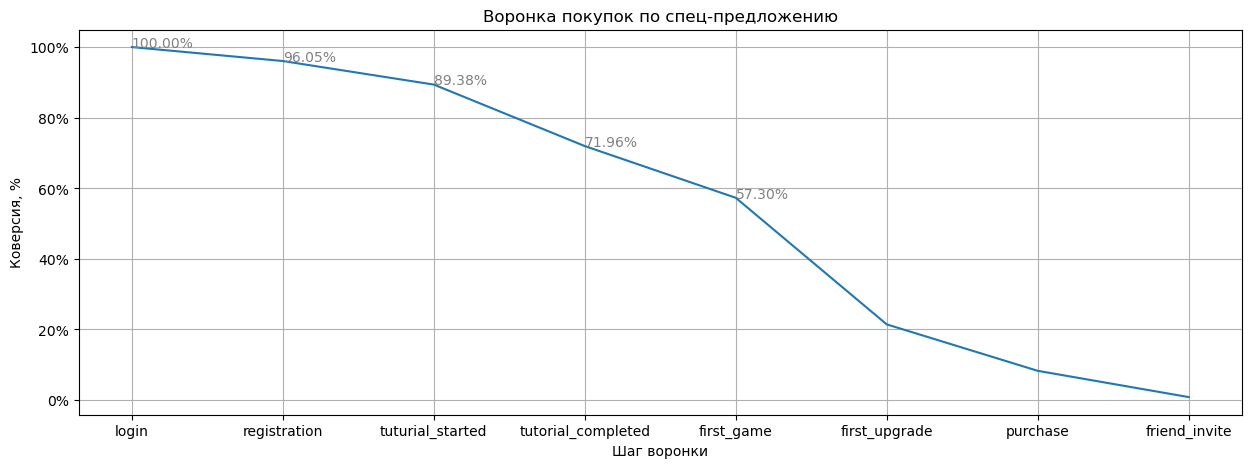

In [190]:
import matplotlib.ticker as mtick
ax = repot_2['%'].plot(figsize = (15, 5), grid = True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

for x, y in zip(range(len(report)), repot_2['%']):
 ax.annotate('{:.2%}'.format(y), xy = (x, y), color = 'grey') #
plt.xlabel('Шаг воронки'), plt.ylabel('Коверсия, %'),
plt.title('Воронка покупок по спец-предложению');

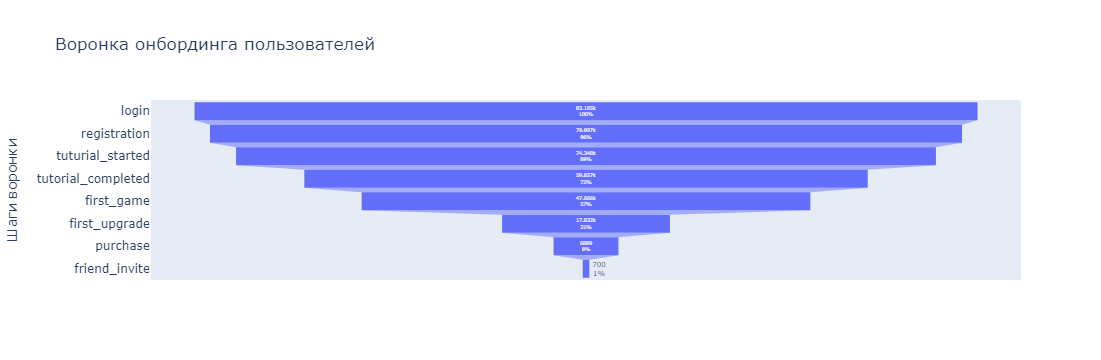

In [192]:
import plotly
from plotly import graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
fig = go.Figure()
fig.add_trace(go.Funnel(
 y = repot_2.index.values,
 x = repot_2['Уникальные пользователи'],
 textinfo = "value+percent initial"
 )
 )
fig.update_layout(
 title = 'Воронка онбординга пользователей',
 yaxis_title = 'Шаги воронки',
 )
fig.show()
